# Introduction

In [4]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import skimage.util
import scipy.ndimage as ndimage
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np

In [5]:
plt.gray()
lena= rgb2gray(imread('lena.tiff'))
cameraman = imread('cameraman.tiff').astype(np.float64)/255

<Figure size 640x480 with 0 Axes>

In [6]:
def gaussian_filter(n_rows: int, n_cols: int, stdv: float):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f: np.ndarray, g: np.ndarray):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))


In [7]:
h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1, 1]])

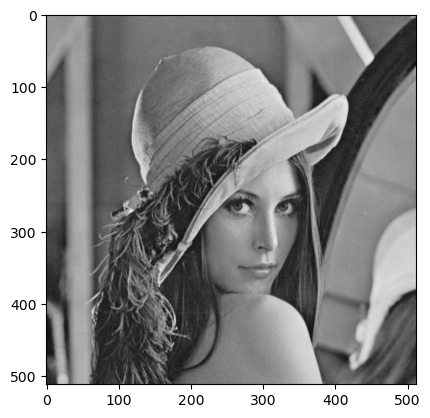

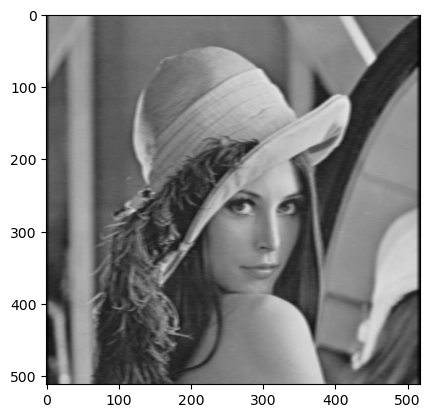

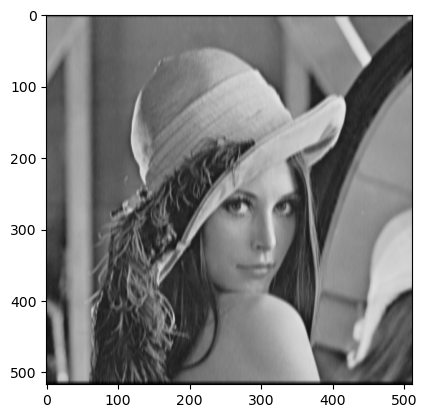

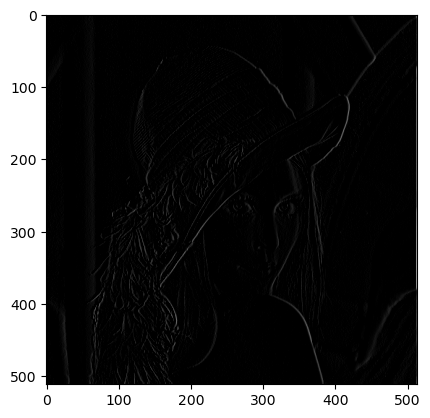

In [8]:
#convolve lena with impulse functions
lena_h1 = signal.convolve2d(lena, h1)
lena_h2 = signal.convolve2d(lena, h2)
lena_h3 = signal.convolve2d(lena, h3)

#plot lena and convolved lena
plt.imshow(lena, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(lena_h1, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(lena_h2, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(lena_h3, cmap='gray', vmin=0, vmax=1)
plt.show()


In [9]:
plt.gray()
lena= rgb2gray(imread('lena.tiff'))
cameraman = imread('cameraman.tiff').astype(np.float64)/255

<Figure size 640x480 with 0 Axes>

In [10]:
h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1, 1]])

# Noise Generation

base


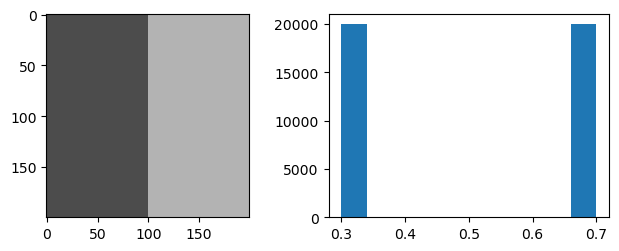

gauss


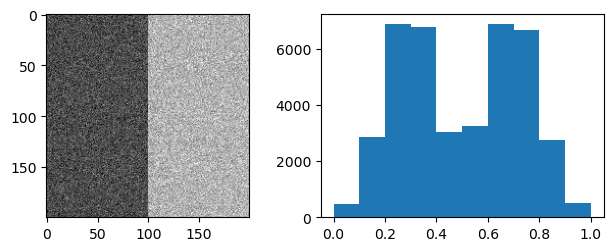

snp


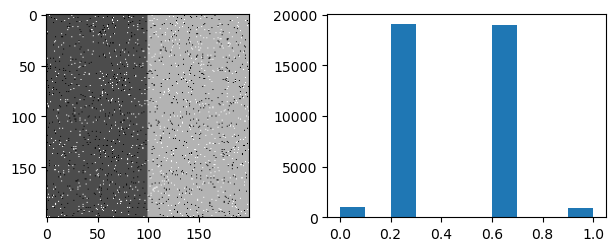

speckle


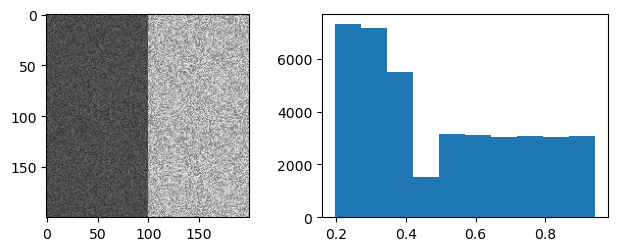

In [14]:
base_toy = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])

def plot_im_hist(image: np.ndarray):
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=1)
    plt.subplot(2, 2, 2)
    plt.hist(image.flatten())
    plt.tight_layout()
    plt.show()

def imnoise_speckle(im, v):
    # im: input image
    # v: variance
    n = np.sqrt(v*12) * (np.random.rand(im.shape[0], im.shape[1]) - 0.5)
    return im + im * n

#additive zero-mean Gaussian (with variance of 0.01)
gauss_toy = skimage.util.random_noise(base_toy, mode='gaussian', clip=True, var=0.01)
# #salt and pepper (with noise density of 0.05)
snp_toy = skimage.util.random_noise(base_toy, mode='s&p', amount=0.05)
# multiplicative speckle noise (with variance of 0.04)
speckle_toy = imnoise_speckle(base_toy, 0.04)

#plot noisy images and corres. histograms
print("base")
plot_im_hist(base_toy)
print("gauss")
plot_im_hist(gauss_toy)
print("snp")
plot_im_hist(snp_toy)
print("speckle")
plot_im_hist(speckle_toy)


noisy_lena


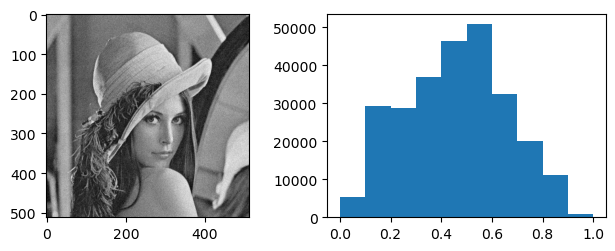

avg_lena


/var/folders/g2/xzgpr9fx6_5cvvl_x157b4qh0000gp/T/ipykernel_35192/4074810680.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


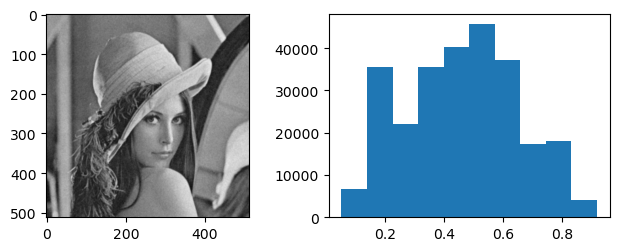

avg_lena


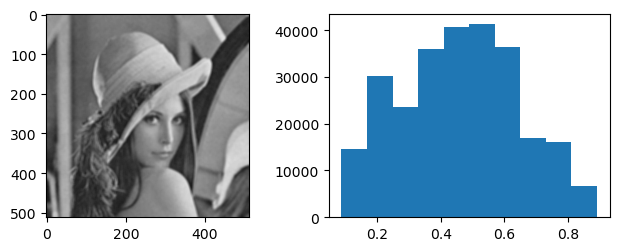

gauss_lena


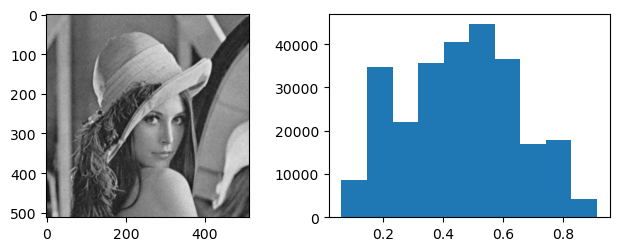

new_noisy_lena


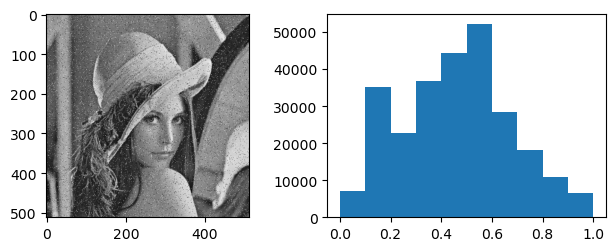

avg_lena_2


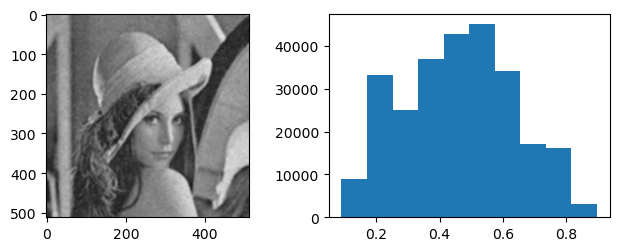

gauss_lena_2


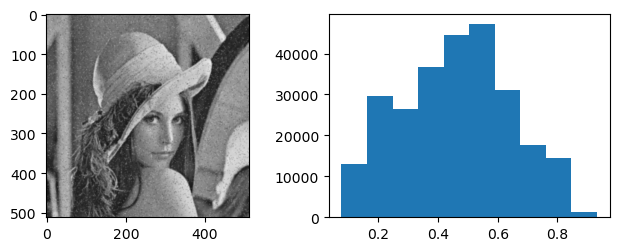

27.38645894293761

In [15]:
#Part 4

#contaminate the Lena image with zero-mean Gaussian noise with a variance of 0.002. Plot the noisy image and the corresponding histogram and PSNR between the noisy image and the original noise-free
#image

#zero mean gaussian noise var=0.002
noisy_lena = skimage.util.random_noise(lena, mode='gaussian', clip=True, var=0.002)

#plot image, histogram, PSNR
print("noisy_lena")
plot_im_hist(noisy_lena)
PSNR(lena, noisy_lena)

#3x3 averaging filter kernel
np.ones((3,3))/(3.0*3.0)
#plot filter
plt.imshow(np.ones((3,3))/(3.0*3.0), cmap='gray', vmin=0, vmax=1)
#apply averaging filter to noisy image
avg_lena = ndimage.convolve(noisy_lena, np.ones((3,3))/(3.0*3.0))
#plot denoised image and histogram
print("avg_lena")
plot_im_hist(avg_lena)
#compute PSNR
PSNR(lena, avg_lena)

#7x7 averaging filter kernel
np.ones((7,7))/(7.0*7.0)
#apply averaging filter to noisy image
avg_lena = ndimage.convolve(noisy_lena, np.ones((7,7))/(7.0*7.0))
#plot denoised image and histogram
print("avg_lena")
plot_im_hist(avg_lena)
#compute PSNR
PSNR(lena, avg_lena)

#7x7 gaussian filter kernel with SD 1
gaussian_filter(7,7,1)
#plot the filter
plt.imshow(gaussian_filter(7,7,1), cmap='gray', vmin=0, vmax=1)
#apply gaussian filter to noisy image
gauss_lena = ndimage.convolve(noisy_lena, gaussian_filter(7,7,1))
#plot denoised image and histogram
print("gauss_lena")
plot_im_hist(gauss_lena)
#compute PSNR
PSNR(lena, gauss_lena)

#create a new noisy image by adding salt and pepper noise (density 0.05) to the image
new_noisy_lena = skimage.util.random_noise(lena, mode='s&p', amount=0.05)
#Apply the 7×7 averaging filter and the Gaussian filter to the noisy image separately
avg_lena_2 = ndimage.convolve(new_noisy_lena, np.ones((7,7))/(7.0*7.0))
gauss_lena_2 = ndimage.convolve(new_noisy_lena, gaussian_filter(7,7,1))
#plot the noisy image, the denoised images using each method, and the corresponding histograms
print("new_noisy_lena")
plot_im_hist(new_noisy_lena)
print("avg_lena_2")
plot_im_hist(avg_lena_2)
print("gauss_lena_2")  
plot_im_hist(gauss_lena_2)
#psnr
PSNR(avg_lena_2, lena)
PSNR(gauss_lena_2, lena)

#Part 5
#Let us now briefly study sharpening techniques based on spatial filtering as well as the effect of sharpening
# filter parameters on image quality. Load the Cameraman image and get intensity of the image within the
# 4 range of 0 to 1. One very useful and customizable technique for sharpening images is high-boost filter. Let 
# us study it at its various stages. First, apply the 7×7 Gaussian filter on the Cameraman image and subtract
# the Gaussian-filtered image from the original Cameraman image. Plot both the Gaussian-filtered image and
# the subtracted image.



#Now we add the subtracted image to the original image. Plot the resulting image.



#Now, instead of adding the subtracted image to the original image, multiply the subtracted image by 0.5 and
# then add it to the original image. Plot the resulting image



